# Module 4 – Part 1: Descriptive Statistics and Data Summarization in Python
This notebook covers descriptive statistics using Python, with real-world examples from the Titanic dataset. We will explore central tendency, spread, and relationships between variables using pandas and NumPy.

## 1. Load and Inspect the Titanic Dataset
We’ll use the Titanic dataset from Seaborn.
Make sure `seaborn` is installed using `pip install seaborn`.

In [45]:
import pandas as pd
import seaborn as sns
import numpy as np

# Load dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 2. Dataset Overview
Check shape, info, and summary statistics of the dataset.

In [46]:
df.shape

(891, 15)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## 3. Descriptive Statistics
Understand data using built-in statistical methods.

In [48]:
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
print("Mean Age:", df['age'].mean())
print("Median Age:", df['age'].median())
print("Mode Age:", df['age'].mode()[0])

Mean Age: 29.69911764705882
Median Age: 28.0
Mode Age: 24.0


## 4. Handling Missing Values

Before performing statistical analysis or model training, it's essential to **identify and handle missing values** in your dataset. Missing data can lead to biased or invalid results if not properly addressed.

The following command:

```python
df.isnull().sum()
```
does two things:

`df.isnull()` creates a Boolean DataFrame where each cell is True if the value is missing (NaN) and False otherwise.

`.sum()` adds up the number of True values (i.e., missing values) in each column.


In [53]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Dropping Missing Values in the 'age' Column

After identifying that the `age` column contains **177 missing values**, we need to decide how to handle them.

One common and straightforward method is to **drop rows** where `age` is missing. This is only recommended when:

- The number of missing entries is relatively **small** compared to the dataset size.
- The missingness is **random** (i.e., not correlated with the outcome or other features).

In our case, 177 out of 891 rows (~20%) is high percentage yet we proceed with dropping for simplicity and demonstration.

We use `dropna()` with the `subset` parameter to specifically target the `age` column.


In [33]:
# Drop rows where 'age' is NaN (missing)
df_clean = df.dropna(subset=['age'])

# Compare size before and after
print(f"Original dataset size: {df.shape[0]} rows")
print(f"After dropping missing 'age': {df_clean.shape[0]} rows")
print(f"Rows removed: {df.shape[0] - df_clean.shape[0]}") # Check this cool feature where you can subtract the values of shapes!


Original dataset size: 891 rows
After dropping missing 'age': 714 rows
Rows removed: 177


# How if we decide to impute instead of dropping?


In [57]:
# df['age_imputed']= df['age'].fillna(df['age'].mean()) # impute by mean
df['age_imputed']= df['age'].fillna(df['age'].median())  # impute by median
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_imputed
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,27.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,19.0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,28.0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,26.0


## 5. Measures of Spread
Explore range, IQR, variance, and standard deviation.

In [35]:
print("Min:", df_clean['age'].min())
print("Max:", df_clean['age'].max())
print("Range:", df_clean['age'].max() - df_clean['age'].min())
print("IQR:", df_clean['age'].quantile(0.75) - df_clean['age'].quantile(0.25))
print("Variance:", df_clean['age'].var())
print("Std Dev:", df_clean['age'].std())

Min: 0.42
Max: 80.0
Range: 79.58
IQR: 17.875
Variance: 211.01912474630805
Std Dev: 14.526497332334042


## Interpreting Statistical Measures of Age

To understand how **age** is distributed among Titanic passengers, we calculate several statistical metrics:

| Metric      | Description                                                                 |
|-------------|-----------------------------------------------------------------------------|
| **Min**     | The youngest passenger age in the dataset. Useful for identifying lower bounds. |
| **Max**     | The oldest passenger. Gives us the upper bound of the age distribution.     |
| **Range**   | Difference between max and min. Shows total spread of age values.           |
| **IQR**     | Interquartile Range = Q3 - Q1. It captures the **middle 50%** of the data, helping identify outliers. |
| **Variance**| Average squared deviation from the mean. Sensitive to outliers.             |
| **Std Dev** | Standard deviation: square root of variance. Describes typical deviation from the mean. |

These measures help quantify **dispersion** (how spread out data is), which complements central tendency (mean, median).


## 6. Correlation and Covariance
Check relationships between numeric columns.

In [58]:
df_clean.corr(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189,-0.552936,-0.196140
pclass,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182,0.099021,0.146320
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329,-0.310463,-0.629818
parch,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119,-0.363079,-0.577524
fare,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000,-0.179740,-0.260136
adult_male,-0.552936,0.099021,0.280328,-0.310463,-0.363079,-0.179740,1.000000,0.396632
alone,-0.196140,0.146320,0.198270,-0.629818,-0.577524,-0.260136,0.396632,1.000000


## 6. Interpreting the Correlation Matrix

The table above shows **pairwise correlation coefficients** between numerical columns in the cleaned Titanic dataset (`df_clean`). These values range from **-1 to +1** and measure the **linear relationship** between two variables.

| Correlation Value | Interpretation             |
|-------------------|----------------------------|
| +1                | Perfect positive correlation |
| 0                 | No linear correlation        |
| -1                | Perfect negative correlation |

---

###  Key Observations:

- **`survived` vs `fare`:**
  `+0.268` → Passengers who paid **higher fares** were **more likely to survive**, possibly due to better-class accommodations.

- **`survived` vs `adult_male`:**
  `-0.553` → Strong **negative correlation**. **Adult males were less likely to survive**, aligning with the "women and children first" policy.

- **`pclass` vs `fare`:**
  `-0.554` → Lower class number (1st class) is associated with **higher fare**. This inverse relationship is expected.

- **`age` vs `pclass`:**
  `-0.369` → Older passengers were more likely to be in **higher classes** (lower `pclass` value).

- **`sibsp` vs `parch`:**
  `+0.384` → A weak positive correlation; passengers who traveled with siblings/spouses also tended to have parents/children aboard.

- **`alone` vs `parch` / `sibsp`:**
  Strong **negative correlations** (`-0.58` and `-0.63`) indicate that if someone was recorded as being **alone**, they had **fewer relatives onboard**.
---
### Why Correlation Matters:
- Helps detect **multicollinearity** in machine learning models.
- Uncovers **linear dependencies** that can be explored visually or statistically.
- Useful for **feature selection** and exploratory data analysis (EDA).



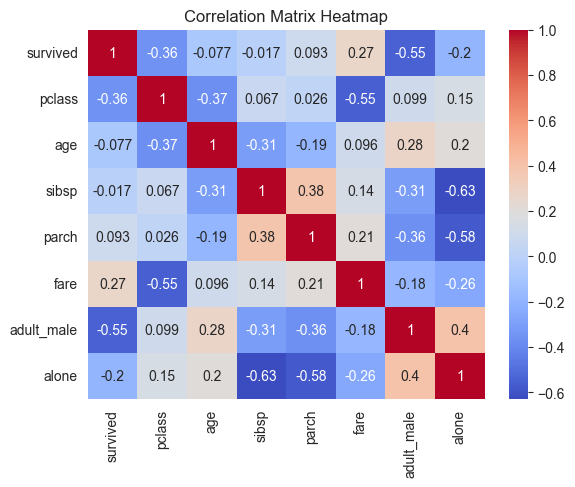

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [60]:
df_clean.cov(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,0.241533,-0.148165,-0.551296,-0.007932,0.039133,6.974923,-0.134285,-0.047812
pclass,-0.148165,0.702663,-4.496004,0.052412,0.018370,-24.583138,0.041017,0.060835
age,-0.551296,-4.496004,211.019125,-4.163334,-2.344191,73.849030,2.012292,1.428550
sibsp,-0.007932,0.052412,-4.163334,0.864497,0.304513,6.806212,-0.142645,-0.290452
parch,0.039133,0.018370,-2.344191,0.304513,0.728103,9.262176,-0.153095,-0.244424
fare,6.974923,-24.583138,73.849030,6.806212,9.262176,2800.413100,-4.700242,-6.827941
adult_male,-0.134285,0.041017,2.012292,-0.142645,-0.153095,-4.700242,0.244191,0.097214
alone,-0.047812,0.060835,1.428550,-0.290452,-0.244424,-6.827941,0.097214,0.246011


## 6.1 Interpreting the Covariance Matrix

Covariance measures the **joint variability** of two numerical variables:
- If the variables tend to increase together → **positive covariance**
- If one increases while the other decreases → **negative covariance**
- If there's no linear relationship → covariance near **0**

Unlike correlation, covariance is **not normalized**:
- It depends on the **scale** of the variables
- Harder to compare directly unless variables have similar units

---

###  Key Observations from Covariance Matrix:

- **`age` vs `fare`:**
  `73.85` → Passengers who are older tend to have slightly higher fares, though the relationship is weak and scale-dependent.

- **`fare` vs `pclass`:**
  `-24.58` → Strong inverse relationship: lower class numbers (1st class) pay more.

- **`age` variance:**
  `211.02` (main diagonal) → Variance of the age column; higher variance implies greater spread.

- **`fare` variance:**
  `2800.41` → Very high variance, reflecting extreme fare values and possible outliers (like 500+ fares for 1st class).

- **`sibsp` vs `parch`:**
  `0.30` → Passengers traveling with siblings/spouses often also have parents/children with them.

- **`survived` vs `fare`:**
  `6.97` → Slight positive covariance: survival is slightly associated with higher fares.

---

### Notes for Data Scientists:

- Use **correlation** when comparing strength and direction of relationships (scale-independent).
- Use **covariance** when magnitude and direction of co-movement is important (e.g., portfolio analysis).




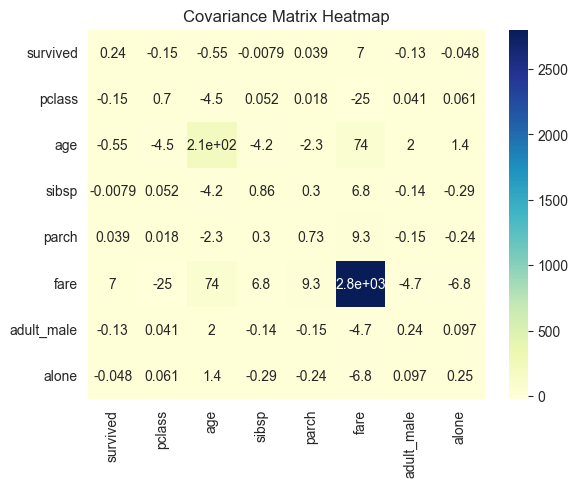

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(df_clean.cov(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title('Covariance Matrix Heatmap')
plt.show()

In [62]:
df.groupby('class')['fare'].mean()

C:\Users\William\AppData\Local\Temp\ipykernel_21372\154304048.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('class')['fare'].mean()


class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64